In [1]:
import numpy as np
import deproject, HandShapeAnalysis, h5py
from homography import pyrs12, spaces
import matplotlib.pyplot as plt
import pptk

In [2]:
path_y = "../recording_data/"
path_n = "../recording_data/"
data = !ls "../recording_data/"

In [93]:
print(data)

['1_tap.hdf5', '2_tap.hdf5', '2_zoomin_yes.hdf5', '2_zoomout_yes.hdf5', '4_move_left_yes.hdf5', '4_move_right_yes.hdf5', 'backup', 'labeled', '封存.zip']


In [3]:
h5f = h5py.File("../recording_data/"+data[4], 'r')
pcl_center = h5f['pcl_center'][...]
trans_matrix = h5f['trans_matrix'][...]
depth_frame= h5f['depth']

In [332]:
import importlib
importlib.reload(HandShapeAnalysis)
analyser = HandShapeAnalysis.Depth2Finger(pcl_center, trans_matrix)
analyser.set_show(debug = True, finger_point_image = True, hull_image = False, 
          detected_defect = False, cluster_point = False, possibility_modal = False)

In [334]:
area_image = analyser.renew_both(depth_frame[42])

clusted_point
[[332   0]
 [233 227]
 [188 226]
 [167 135]
 [201  77]
 [239  30]
 [278   0]]
Angel_A
[132.1087304  152.46938104 114.76154542  28.11204803  13.61371787]
matched
[[233 228]
 [188 226]]
high_point
[[-0.02455027  0.02262405  0.03154906]
 [ 0.01493046  0.02153878  0.0283641 ]]
----------renew_high---------
clusted_point
[[402  81]
 [323 240]
 [262 247]
 [251 147]
 [264 130]
 [331  79]
 [364  66]]
Angel_A
[ 76.97271912 143.70102616 137.30376032 151.76255446 114.73857658
  31.85959274  40.54157424]
matched
[[264 249]
 [323 240]]
depth_point
[[ 0.01379315  0.00767943  0.01004596]
 [-0.02800248  0.02121227  0.03050596]]
----------renew_depth---------
point  0 [ True False]
point  1 [False  True]
[[ 0.01379315  0.00767943  0.01004596]
 [-0.02800248  0.02121227  0.03050596]]
----------renew_both---------


In [335]:
plt.imshow(analyser.finger_point_image)

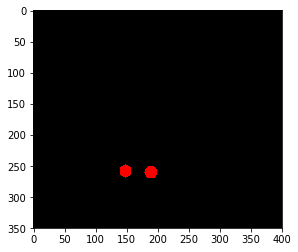

In [321]:
plt.imshow(analyser.finger_point_image)

In [76]:
area_image.shape

(3, 40, 40, 3)

# find the size of the image

In [10]:
HandShapeAnalysis.ROI_filter(analyser.cloud)

(array([False, False, False, ..., False, False, False]), 0.9019774011299436)

In [11]:
analyser.cloud[HandShapeAnalysis.ROI_filter(analyser.cloud)[0]]

array([[ 0.05487668, -0.18459345,  0.10357107],
       [ 0.05585626, -0.1842306 ,  0.10271683],
       [ 0.05493345, -0.18448761,  0.10263649],
       ...,
       [-0.06177806,  0.13464549,  0.00073596],
       [-0.06233816,  0.13464731,  0.00073275],
       [-0.06289844,  0.1346492 ,  0.00072943]], dtype=float32)

In [12]:
len(analyser.cloud[HandShapeAnalysis.ROI_filter(analyser.cloud)[0]])

126953

sizex * (sizex*ratio) = numberOfPoint
sizex = sqrt(numberOfPoint/ratio)

In [13]:
len(analyser.cloud[HandShapeAnalysis.ROI_filter(analyser.cloud)[0]])/HandShapeAnalysis.ROI_filter(analyser.cloud)[1]

140749.6461008456

In [17]:
np.sqrt(len(analyser.cloud[HandShapeAnalysis.ROI_filter(analyser.cloud)[0]])/HandShapeAnalysis.ROI_filter(analyser.cloud)[1])

375.166157989824

In [18]:
np.sqrt(len(analyser.cloud[HandShapeAnalysis.ROI_filter(analyser.cloud)[0]])/HandShapeAnalysis.ROI_filter(analyser.cloud)[1])*HandShapeAnalysis.ROI_filter(analyser.cloud)[1]

338.3913961755673

so...400*350

Bug found 2 tap frame:39

In [224]:
h5f = h5py.File("../recording_data/"+data[1], 'r')
pcl_center = h5f['pcl_center'][...]
trans_matrix = h5f['trans_matrix'][...]
depth_frame= h5f['depth']

In [336]:
import importlib
importlib.reload(HandShapeAnalysis)
analyser = HandShapeAnalysis.Depth2Finger(pcl_center, trans_matrix)
analyser.set_show(debug = True, finger_point_image = True, hull_image = False, 
          detected_defect = False, cluster_point = False, possibility_modal = False)

In [337]:
area_image = analyser.renew_both(depth_frame[3])

clusted_point
[[332   2]
 [255 186]
 [230 230]
 [187 229]
 [168 131]
 [191  92]
 [239  25]
 [275   2]]
Angel_A
[158.38522106 137.96093613 120.65066796 154.66068501  79.3302172
  16.59393262  22.5205656  116.16156644]
matched
[[231 231]
 [185 227]]
high_point
[[ 0.02661162  0.00188882 -0.02416332]
 [ 0.02266315  0.02655833  0.01772133]]
----------renew_high---------
clusted_point
[[404  79]
 [319 241]
 [257 245]
 [247 150]
 [263 127]
 [329  76]
 [363  62]
 [388  66]]
Angel_A
[109.60408815 172.87498365 149.42077313 135.7848246  160.21665236
 130.04217479  27.88097942  43.93701669]
matched
[[256 245]
 [319 242]]
depth_point
[[ 0.01771384  0.02309571  0.02601608]
 [-0.02525178  0.02367094  0.03063656]]
----------renew_depth---------
point  0 [ True  True]
point  1 [False  True]
3
[[ 0.55003909  0.65062859  0.02601608]
 [ 0.42866729  0.65243012  0.03063656]
 [ 0.57517408  0.58421177 -0.02416332]]
[[192 260]
 [150 260]
 [201 233]]
[[ 0.01771384  0.02309571  0.02601608]
 [-0.02525178  0.02367

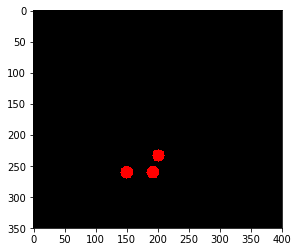

In [338]:
plt.imshow(analyser.finger_point_image)

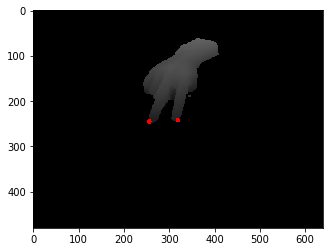

In [231]:
plt.imshow(analyser.D_finger_point_image)

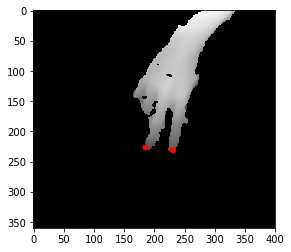

In [232]:
plt.imshow(analyser.H_finger_point_image)

In [339]:
h5f = h5py.File("../recording_data/"+data[2], 'r')
pcl_center = h5f['pcl_center'][...]
trans_matrix = h5f['trans_matrix'][...]
depth_frame= h5f['depth']

In [340]:
import importlib
importlib.reload(HandShapeAnalysis)
analyser = HandShapeAnalysis.Depth2Finger(pcl_center, trans_matrix)
analyser.set_show(debug = True, finger_point_image = True, hull_image = False, 
          detected_defect = False, cluster_point = False, possibility_modal = False)

In [341]:
area_image = analyser.renew_both(depth_frame[0])

clusted_point
[[399  28]
 [219 211]
 [199 211]
 [188 140]
 [358   5]
 [399   0]]
Angel_A
[179.37497993  56.58061918 132.13759477 139.27946353]
matched
[[188 139]]
high_point
[[ 0.01531228 -0.05764076  0.06265839]]
----------renew_high---------
clusted_point
[[474 106]
 [311 249]
 [277 252]
 [268 141]
 [448  61]
 [476  66]]
Angel_A
[130.88137539 155.55604522 143.69387621  90.42863873  68.22871447
 117.98825602]
matched
[]
depth_point
[]
----------renew_depth---------


IndexError: too many indices for array